# 「標準ベイズ統計学」の勉強メモ

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
import matplotlib.pyplot as plt

## 3.2 ポアソンモデル
確率変数Yの予測モデルがポアソン分布と考えられるとき
- 同時確率密度関数P(y1..yn|θ)はパラメータθの元で各確率変数の確率密度の積で表される
- 同時確率密度関数と共役な分布として、パラメータθの事前分布はガンマ分布が考えられる
- なので事後分布はガンマ分布になる
- 予測分布p(y~ | y1..yn)は負の二項分布に従う

大卒の事後分布の95%信用区間[1.70494315 2.22267902]
非大卒の事後分布の95%信用区間[1.17343691 1.89083626]


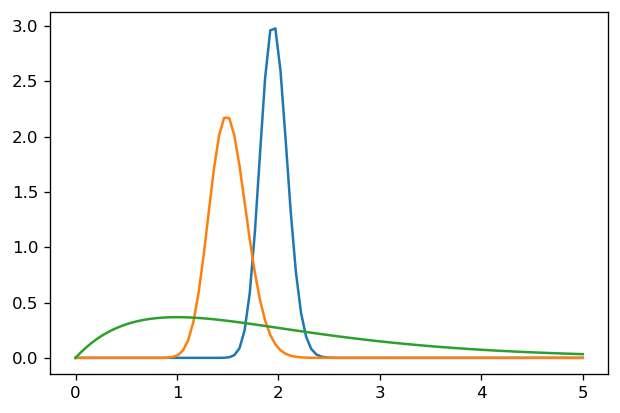

In [32]:
#ガンマ分布(事前分布)のパラメータを決定
a = 2
b = 1

# サンプルデータの定義
n1 = 111 # 大卒で子供を持っている人の数
sy1 = 217 # 大卒の人の数
n2 = 44 # 非大卒で子供を持っている人の数
sy2 = 66 # 非大卒の人の数

# 大卒の事後分布
a1_posterior = a+sy1
b1_posterior = b+n1
mu_posterior = a1_posterior / b1_posterior # 事後分布の期待値はこうなる
gamma_dist1 = gamma(a1_posterior, scale=1/b1_posterior)
print(f"大卒の事後分布の95%信用区間{gamma_dist1.ppf([0.025, 0.975])}")

# 非大卒の事後分布
a2_posterior = a+sy2
b2_posterior = b+n2
mu_posterior = a2_posterior / b2_posterior # 事後分布の期待値はこうなる
gamma_dist2 = gamma(a2_posterior, scale=1/b2_posterior)
print(f"非大卒の事後分布の95%信用区間{gamma_dist2.ppf([0.025, 0.975])}")

ls = np.linspace(0, 5, 100)
fig = plt.figure(dpi=120)
ax = fig.add_subplot(111)
ax.plot(ls, gamma_dist1.pdf(ls))
ax.plot(ls, gamma_dist2.pdf(ls))
ax.plot(ls, gamma(a, scale=1/b).pdf(ls))
plt.show()

## 7.5欠測データの観測

In [78]:
with open("../data/diabetes_200_miss.dat.txt") as f:
    data = f.readlines()
data = [d[:-1].split() for d in data]
df = pd.DataFrame(data, columns=["glu", "bp", "skin", "bmi"]).drop(0).replace("NA", np.nan)
df.head()

glu    bp  skin   bmi
1   86.0  68.0  28.0  30.2
2  195.0  70.0  33.0   NaN
3   77.0  82.0   NaN  35.8
4    NaN  76.0  43.0  47.9
5  107.0  60.0   NaN   NaN

In [79]:
# 事前分布のパラメータ
n = df.shape[0]
p = df.shape[1]

mu0 = np.array([120, 64, 26, 26]) # 事前平均
sd0 = mu0 / 2

L0 = np.ones((p, p)) * 0.1
for i in range(len(L0)):
    L0[i][i] = 1
L0 = np.outer(sd0, sd0) * L0
nu0 = p+2
S0 = L0

# 初期値
sigma = S0
Y_full = df.copy()
O = Y_full.isna().to_numpy() * 1
